In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

plasma_df = pd.read_csv('/content/drive/MyDrive/4BIT/plasma_processed.csv')
serum_df = pd.read_csv('/content/drive/MyDrive/4BIT/serum_processed.csv')

In [ ]:
plasma_df.head(5)

,Unnamed: 0,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,1,9483,103,101,963,389,123,20744,139,36,...,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,2,27468,207,155,335,227,178,8611,78,91,...,17898,37179,157,180080,8386,118,103083,324,929,disease
2,3,13976,86,78,176,152,83,22792,92,97,...,29503,30670,211,138861,15822,119,92045,253,610,disease
3,4,19449,178,104,467,270,157,29418,123,92,...,16501,27573,71,183633,14024,102,97349,223,746,disease
4,5,17209,258,103,979,314,211,16713,76,42,...,24023,30096,222,255081,23154,58,159671,189,2022,disease


In [ ]:
serum_df.head(5)

,Unnamed: 0,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,0,9582,279,82,61,357,122,24944,56,32,...,34239,54924,43,226295,11606,68,153849,194,811,disease
1,1,28847,161,78,84,205,258,10680,104,49,...,20080,37597,203,96226,10188,71,110735,294,910,disease
2,2,13627,162,53,133,139,159,27201,160,80,...,29191,28707,211,155596,16617,123,95509,253,804,disease
3,3,20758,6671,93,78,335,225,32347,242,59,...,16637,27873,71,191671,15214,84,96219,157,806,disease
4,4,15692,108,98,69,250,120,18357,60,25,...,29820,30132,200,333019,20281,62,159853,188,1226,disease


In [ ]:
plasma_df = plasma_df[['asparagine',
                'benzoic acid',
                'tryptophan',
                'uric acid',
                '5-hydroxynorvaline NIST',
                'alpha-ketoglutarate',
                'citrulline',
                'glutamine',
                'hypoxanthine',
                'malic acid',
                'methionine sulfoxide',
                'nornicotine',
                'octadecanol',
                '3-phosphoglycerate',
                '5-methoxytryptamine',
                'adenosine-5-monophosphate',
                'aspartic acid',
                'lactic acid',
                'maltose',
                'maltotriose',
                'N-methylalanine',
                'phenol',
                'phosphoethanolamine',
                'pyrophosphate',
                'pyruvic acid',
                'taurine' , 'Class']]

serum_df = serum_df[['cholesterol',
            'lactic acid',
            'N-methylalanine',
            'phenylalanine',
            'aspartic acid',
            'deoxypentitol',
            'glutamic acid',
            'malic acid',
            'phenol',
            'taurine' , 'Class']]

In [ ]:
# Assuming 'Class' is the column name containing 'disease' and 'control' values in plasma_df and serum_df

# Convert 'disease' to 1 and 'control' to 0 in plasma_df
plasma_df['Class'] = plasma_df['Class'].apply(lambda x: 1 if x == 'disease' else 0)

# Convert 'disease' to 1 and 'control' to 0 in serum_df
serum_df['Class'] = serum_df['Class'].apply(lambda x: 1 if x == 'disease' else 0)


<ipython-input-6-2550881cc133>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plasma_df['Class'] = plasma_df['Class'].apply(lambda x: 1 if x == 'disease' else 0)
<ipython-input-6-2550881cc133>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serum_df['Class'] = serum_df['Class'].apply(lambda x: 1 if x == 'disease' else 0)


In [ ]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

plasma_df_X = plasma_df.drop(['Class'] , axis = 1)
scaler = StandardScaler()
plasma_df_X = scaler.fit_transform(plasma_df_X)

In [ ]:
plasma_columns = ['asparagine',
                'benzoic acid',
                'tryptophan',
                'uric acid',
                '5-hydroxynorvaline NIST',
                'alpha-ketoglutarate',
                'citrulline',
                'glutamine',
                'hypoxanthine',
                'malic acid',
                'methionine sulfoxide',
                'nornicotine',
                'octadecanol',
                '3-phosphoglycerate',
                '5-methoxytryptamine',
                'adenosine-5-monophosphate',
                'aspartic acid',
                'lactic acid',
                'maltose',
                'maltotriose',
                'N-methylalanine',
                'phenol',
                'phosphoethanolamine',
                'pyrophosphate',
                'pyruvic acid',
                'taurine']
plasma_df_X = pd.DataFrame(plasma_df_X , columns = plasma_columns )
plasma_df_X['Class'] = plasma_df['Class']
plasma_df = plasma_df_X
plasma_df.head()

,asparagine,benzoic acid,tryptophan,uric acid,5-hydroxynorvaline NIST,alpha-ketoglutarate,citrulline,glutamine,hypoxanthine,malic acid,...,lactic acid,maltose,maltotriose,N-methylalanine,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,Class
0,-0.384776,-1.305536,0.523924,-1.016102,-0.853596,0.512135,-0.326638,-0.190839,0.415434,0.756656,...,-0.042836,-0.338804,-1.207098,-0.095912,-0.099283,0.034358,-0.273237,1.375625,0.414720,1
1,0.947427,-0.462690,-0.898525,-1.243045,-0.821435,-0.392098,0.687196,1.044991,1.371994,0.094793,...,0.154308,-0.294908,-0.127933,-1.188920,0.216627,-0.830514,-0.405431,0.290328,-0.157190,1
2,0.692741,-0.487775,0.829649,-0.233142,-0.351887,0.353377,-0.563638,0.355438,-0.305743,0.064009,...,1.064361,0.235490,0.675167,-0.710083,0.984663,0.021254,0.950369,-0.192526,0.829635,1
3,0.349894,1.682051,-1.106561,-0.477333,-0.744249,-0.751031,-0.994847,1.152050,1.912876,-0.413148,...,0.526588,-0.192487,-0.378901,1.832288,0.687592,-0.188412,-0.592977,-0.663066,1.246152,1
4,0.297651,-1.197672,0.013588,0.762636,0.992437,-0.143607,0.766196,-0.305898,0.245156,0.756656,...,-0.325137,-0.009591,1.428073,0.911157,-0.273178,0.322649,0.521378,-0.094013,0.075899,1


In [ ]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

serum_df_X = serum_df.drop(['Class'] , axis = 1)
scaler = StandardScaler()
serum_df_X = scaler.fit_transform(serum_df_X)

In [ ]:
serum_columns = ['cholesterol',
            'lactic acid',
            'N-methylalanine',
            'phenylalanine',
            'aspartic acid',
            'deoxypentitol',
            'glutamic acid',
            'malic acid',
            'phenol',
            'taurine' ]
serum_df_X = pd.DataFrame(serum_df_X , columns = serum_columns )
serum_df_X['Class'] = serum_df['Class']
serum_df = serum_df_X
serum_df.head()

,cholesterol,lactic acid,N-methylalanine,phenylalanine,aspartic acid,deoxypentitol,glutamic acid,malic acid,phenol,taurine,Class
0,0.123632,0.094923,-0.186546,-0.343844,-0.413389,-1.267860,-0.211881,0.470533,-0.121362,0.005331,1
1,1.163621,0.676247,-1.136707,0.299430,0.176392,0.007955,-0.477977,-0.318708,0.446950,0.857427,1
2,1.335657,1.634194,-0.719219,-0.855227,-0.141775,0.573702,0.751584,-0.127763,1.341798,0.035604,1
3,1.049709,0.264560,1.632207,-0.053586,0.282325,-0.038228,-0.312322,0.063183,0.251028,0.783080,1
4,-0.756814,-0.827738,0.855814,-0.041329,-0.557444,-0.615520,-0.803098,0.126831,-1.471972,-0.745261,1


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Dense, Dropout
from keras.activations import relu

In [ ]:
plasma_df.shape

(82, 27)

In [ ]:
serum_df.shape

(82, 11)

#Plasma
array(['3-hydroxybutanoic acid', 'alanine', 'asparagine', 'azelaic acid',
       'benzoic acid', 'dodecanol', 'fumaric acid', 'heptadecanoic acid',
       'hydroxycarbamate NIST', 'hydroxylamine', 'indole-3-lactate',
       'lysine', 'p-cresol', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'urea', 'uric acid'], dtype=object)


#Serum
['2-ketoisocaproic acid',
 '3-phosphoglycerate',
 'alanine',
 'capric acid',
 'cholesterol',
 'cysteine-glycine',
 'glycolic acid',
 'heptadecanoic acid',
 'leucine',
 'lysine',
 'ornithine',
 'phosphate',
 'threonine',
 'tryptophan',
 'urea',
 'uric acid',
 'valine']


In [ ]:
plasma_df.shape

(82, 27)

In [ ]:
serum_df.shape

(82, 11)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
# model_plasma = Sequential([
#     Dense(512, activation='relu', input_dim=19),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.4),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dropout(0.1),
#     Dense(8, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])
model_cnn_plasma = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(26,1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=16, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_cnn_plasma.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 16)             1552      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 1, 16)             0

In [ ]:
# model_serum = Sequential([
#     Dense(512, activation='relu', input_dim=17),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.4),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dropout(0.1),
#     Dense(8, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

In [ ]:
model_cnn_serum = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),  # Output size: 4
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # Output size: 2
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model_cnn_serum.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 8, 64)             256       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 4, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 2, 32)             6176      
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
from sklearn.model_selection import train_test_split


plasma_train , plasma_test = train_test_split(plasma_df, random_state = 42 , test_size = 0.2)


serum_train , serum_test = train_test_split(serum_df , random_state = 42 , test_size = 0.2)

In [ ]:
print(plasma_train.shape)
print(plasma_test.shape)

print(serum_train.shape)
print(serum_test.shape)

(65, 27)
(17, 27)
(65, 11)
(17, 11)


In [ ]:
plasma_X_train = plasma_train.drop(['Class'] , axis = 1)
plasma_Y_train = plasma_train[['Class']]

serum_X_train = serum_train.drop(['Class'] , axis = 1)
serum_Y_train = serum_train[['Class']]

In [ ]:
plasma_X_test = plasma_test.drop(['Class'] , axis = 1)
plasma_Y_test = plasma_test[['Class']]

serum_X_test = serum_test.drop(['Class'] , axis = 1)
serum_Y_test = serum_test[['Class']]

In [ ]:
model_cnn_plasma.compile(optimizer= 'adam' , loss = "binary_crossentropy" , metrics = ['accuracy'])
model_cnn_serum.compile(optimizer= 'adam' , loss = "binary_crossentropy" , metrics = ['accuracy'])

In [ ]:
total_plasma_accuracy = {}
total_serum_accuracy = {}
total_plasma_loss = {}
total_serum_loss = {}

# Training and evaluating Plasma model

In [ ]:
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint


def plasma_model_evaluate(input_epochs) :
  # Define a checkpoint callback to save the best model
  model_checkpoint_plasma = f"/content/drive/MyDrive/4BIT/plasma_model/model_epoch_{input_epochs}.h5"
  checkpoint = ModelCheckpoint(model_checkpoint_plasma, monitor='val_accuracy', save_best_only=True, mode='max', verbose=0)

  # Train the model
  model_cnn_plasma.fit(plasma_X_train, plasma_Y_train, epochs=input_epochs, verbose=0, callbacks=[checkpoint] , batch_size = 1)

  # Evaluate the model on the test data
  loss_plasma, accuracy_plasma = model_cnn_plasma.evaluate(plasma_X_test, plasma_Y_test, verbose=0)
  print('evaluation loss : ' , loss_plasma)
  print('evaluation accuracy : ' , accuracy_plasma)

  model_plasma_weights = model_cnn_plasma.get_weights()

  model_cnn_plasma.set_weights(model_plasma_weights)

  # Save the best model
  model_cnn_plasma.save('/content/drive/MyDrive/4BIT/plasma_best_model.h5')

  # save the accuracy adn the loss
  total_plasma_accuracy[f"{input_epochs}"] = accuracy_plasma
  total_plasma_loss[f"{input_epochs}"] = loss_plasma

# Training and evaluating Serum model

In [ ]:
import numpy as np
import pandas as pd
from keras.callbacks import ModelCheckpoint


def serum_model_evaluate(input_epochs) :
  model_checkpoint_serum = f"/content/drive/MyDrive/4BIT/serum_model/model_epoch_{input_epochs}.h5"
  # Define a checkpoint callback to save the best model
  checkpoint = ModelCheckpoint(model_checkpoint_serum, monitor='val_accuracy', save_best_only=True, mode='max', verbose=0)

  # Train the model
  model_cnn_serum.fit(serum_X_train, serum_Y_train, epochs=input_epochs, verbose=0, callbacks=[checkpoint] , batch_size = 1)

  # Evaluate the model on the test data
  loss_serum, accuracy_serum = model_cnn_serum.evaluate(serum_X_test, serum_Y_test, verbose=0)
  print('evaluation loss : ' , loss_serum)
  print('serum accuracy : ' , accuracy_serum)


  model_serum_weights = model_cnn_serum.get_weights()
  model_cnn_serum.set_weights(model_serum_weights)

  # Save the best model
  model_cnn_serum.save('/content/drive/MyDrive/4BIT/serum_best_model.h5')

  # save the accuracy and loss
  total_serum_accuracy[f"{input_epochs}"] = accuracy_serum
  total_serum_loss[f"{input_epochs}"] = loss_serum

# Evaluating the plasma and serum model

In [ ]:
steps = 1
input_epochs = 1
max_epoch = 25

while input_epochs <= max_epoch :
  print('Epoch : ' , input_epochs)
  plasma_model_evaluate(input_epochs)
  print('plasma model evaluation done')
  serum_model_evaluate(input_epochs)
  print('serum model evaluation done')
  print()
  input_epochs = input_epochs + steps

Epoch :  1


evaluation loss :  1.3092961311340332
evaluation accuracy :  0.7058823704719543


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


plasma model evaluation done


evaluation loss :  1.5189472436904907
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.3121066093444824
evaluation accuracy :  0.7058823704719543


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


plasma model evaluation done


evaluation loss :  1.549903392791748
serum accuracy :  0.8235294222831726


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


serum model evaluation done

Epoch :  3


evaluation loss :  1.684053897857666
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.6860716342926025
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  4


evaluation loss :  1.74165678024292
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.7421636581420898
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  5


evaluation loss :  1.6944154500961304
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.8505604267120361
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  6


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.3822836875915527
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.9618557691574097
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  7


evaluation loss :  1.4831963777542114
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.122997999191284
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  8


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.403723955154419
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.2321555614471436
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  9


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.084914207458496
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.384704113006592
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.493493914604187
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.6052298545837402
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  11


evaluation loss :  1.6361016035079956
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.819275379180908
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  12


evaluation loss :  1.8719549179077148
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.88594126701355
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  13


evaluation loss :  1.9128687381744385
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.018209218978882
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  14


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.0559210777282715
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.105858325958252
serum accuracy :  0.8235294222831726


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


serum model evaluation done

Epoch :  15


evaluation loss :  2.2625997066497803
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.152332067489624
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  16


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  1.9295244216918945
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.374307870864868
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  17


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.4637794494628906
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.693908214569092
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  18


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.599534511566162
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


evaluation loss :  4.0190043449401855
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  19


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.673025369644165
evaluation accuracy :  0.7058823704719543


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


plasma model evaluation done


evaluation loss :  4.232066631317139
serum accuracy :  0.8235294222831726


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


serum model evaluation done

Epoch :  20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.7601215839385986
evaluation accuracy :  0.7058823704719543


plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  4.46384334564209
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  21


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.43825626373291
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  4.553618431091309
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  22


evaluation loss :  3.0489487648010254
evaluation accuracy :  0.7058823704719543
plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.299478530883789
serum accuracy :  0.8235294222831726


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


serum model evaluation done

Epoch :  23


evaluation loss :  2.8373093605041504
evaluation accuracy :  0.7058823704719543


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  3.902233839035034
serum accuracy :  0.8235294222831726
serum model evaluation done

Epoch :  24


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  2.732114553451538
evaluation accuracy :  0.7058823704719543


plasma model evaluation done


evaluation loss :  4.168662071228027
serum accuracy :  0.8235294222831726


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


serum model evaluation done

Epoch :  25


evaluation loss :  2.9287526607513428
evaluation accuracy :  0.7058823704719543


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


plasma model evaluation done


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


evaluation loss :  4.553452491760254
serum accuracy :  0.8235294222831726
serum model evaluation done



In [ ]:
total_plasma_accuracy

{'1': 0.7058823704719543,
 '2': 0.7058823704719543,
 '3': 0.7058823704719543,
 '4': 0.7058823704719543,
 '5': 0.7058823704719543,
 '6': 0.7058823704719543,
 '7': 0.7058823704719543,
 '8': 0.7058823704719543,
 '9': 0.7058823704719543,
 '10': 0.7058823704719543,
 '11': 0.7058823704719543,
 '12': 0.7058823704719543,
 '13': 0.7058823704719543,
 '14': 0.7058823704719543,
 '15': 0.7058823704719543,
 '16': 0.7058823704719543,
 '17': 0.7058823704719543,
 '18': 0.7058823704719543,
 '19': 0.7058823704719543,
 '20': 0.7058823704719543,
 '21': 0.7058823704719543,
 '22': 0.7058823704719543,
 '23': 0.7058823704719543,
 '24': 0.7058823704719543,
 '25': 0.7058823704719543}

In [ ]:
total_serum_accuracy

{'1': 0.8235294222831726,
 '2': 0.8235294222831726,
 '3': 0.8235294222831726,
 '4': 0.8235294222831726,
 '5': 0.8235294222831726,
 '6': 0.8235294222831726,
 '7': 0.8235294222831726,
 '8': 0.8235294222831726,
 '9': 0.8235294222831726,
 '10': 0.8235294222831726,
 '11': 0.8235294222831726,
 '12': 0.8235294222831726,
 '13': 0.8235294222831726,
 '14': 0.8235294222831726,
 '15': 0.8235294222831726,
 '16': 0.8235294222831726,
 '17': 0.8235294222831726,
 '18': 0.8235294222831726,
 '19': 0.8235294222831726,
 '20': 0.8235294222831726,
 '21': 0.8235294222831726,
 '22': 0.8235294222831726,
 '23': 0.8235294222831726,
 '24': 0.8235294222831726,
 '25': 0.8235294222831726}

In [ ]:
total_plasma_loss

{'1': 1.3092961311340332,
 '2': 1.3121066093444824,
 '3': 1.684053897857666,
 '4': 1.74165678024292,
 '5': 1.6944154500961304,
 '6': 1.3822836875915527,
 '7': 1.4831963777542114,
 '8': 1.403723955154419,
 '9': 1.084914207458496,
 '10': 1.493493914604187,
 '11': 1.6361016035079956,
 '12': 1.8719549179077148,
 '13': 1.9128687381744385,
 '14': 2.0559210777282715,
 '15': 2.2625997066497803,
 '16': 1.9295244216918945,
 '17': 2.4637794494628906,
 '18': 2.599534511566162,
 '19': 2.673025369644165,
 '20': 2.7601215839385986,
 '21': 3.43825626373291,
 '22': 3.0489487648010254,
 '23': 2.8373093605041504,
 '24': 2.732114553451538,
 '25': 2.9287526607513428}

In [ ]:
total_serum_loss

{'1': 1.5189472436904907,
 '2': 1.549903392791748,
 '3': 1.6860716342926025,
 '4': 1.7421636581420898,
 '5': 1.8505604267120361,
 '6': 1.9618557691574097,
 '7': 2.122997999191284,
 '8': 2.2321555614471436,
 '9': 2.384704113006592,
 '10': 2.6052298545837402,
 '11': 2.819275379180908,
 '12': 2.88594126701355,
 '13': 3.018209218978882,
 '14': 3.105858325958252,
 '15': 3.152332067489624,
 '16': 3.374307870864868,
 '17': 3.693908214569092,
 '18': 4.0190043449401855,
 '19': 4.232066631317139,
 '20': 4.46384334564209,
 '21': 4.553618431091309,
 '22': 3.299478530883789,
 '23': 3.902233839035034,
 '24': 4.168662071228027,
 '25': 4.553452491760254}

In [ ]:
epochs_list = []
input_epochs = 10
max_epoch = 56
while input_epochs <= max_epoch :
  epochs_list.append(input_epochs)
  input_epochs = input_epochs + 2

In [ ]:
# obtaining the best model accuracy
best_plasma_accuracy = max(total_plasma_accuracy) * 100
best_serum_accuracy = max(total_serum_accuracy) * 100

print('best plasma accuracy : ' , best_plasma_accuracy)
print('best serum accuracy : ' , best_serum_accuracy)

best plasma accuracy :  9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999
best serum accuracy :  9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999


ValueError: x and y must have same first dimension, but have shapes (24,) and (25,)

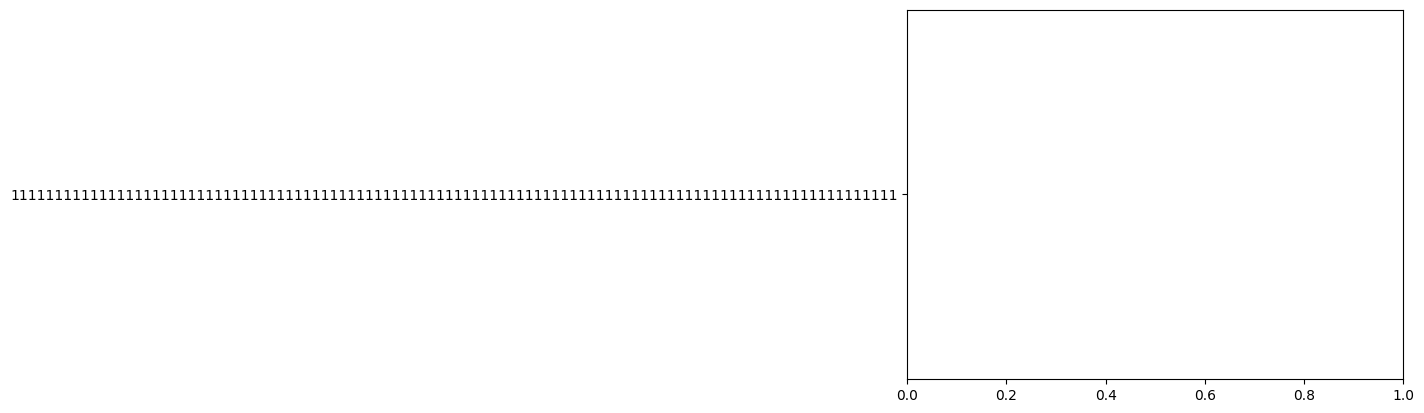

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

total_plasma_accuracy_percentages = list(map(lambda x: x * 100, total_plasma_accuracy))

# Create an array
total_plasma_accuracy_numpy = np.array(total_plasma_accuracy_percentages)
epochs_list_numpy = np.array(epochs_list)

# Plot the array as a line graph
plt.plot(epochs_list_numpy , total_plasma_accuracy_numpy)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Plasma Accuracy')
plt.title('Accuracy graph - Plasma')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

total_serum_accuracy_percentages = list(map(lambda x: x * 100, total_serum_accuracy))

# Create an array
total_serum_accuracy_numpy = np.array(total_serum_accuracy_percentages)
epochs_list_numpy = np.array(epochs_list)

# Plot the array as a line graph
plt.plot(epochs_list_numpy , total_serum_accuracy_numpy)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Serum Accuracy')
plt.title('Accuracy graph - Serum')

# Display the plot
plt.show()
